<a href="https://colab.research.google.com/github/mfilipak/FILIPAK-DATA-SCIENCE/blob/main/DIA1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dia 1 - VISÃO GERAL DE MÉTODOS DE REGRESSÃO E ÁRVORES DE DECISÃO

Referências:
* https://jakevdp.github.io/PythonDataScienceHandbook/ - Esse livro contém uma boa introdução ao Python e aos métodos "clássicos" de machine learning.
* https://www.youtube.com/watch?v=SXBG3RGr_Rc  MIT Course Learning Identification Trees / Disorder (Explicação didática da fundamentação de "árvores de decisão" - Para quem quiser entender como o algoritmo pode ser implementado)

In [ ]:
from sklearn.datasets import fetch_openml

# Carregar os dados MNIST
mnist = fetch_openml('mnist_784', version=1, parser="pandas")

# O conjunto de dados é retornado como um objeto semelhante a um dicionário com os dados e os alvos
X, y = mnist["data"], mnist["target"]

# X é o array de imagens, e y é o array de rótulos
# Cada imagem é representada como um array 1D de 784 características (28x28 pixels)
# Você pode querer converter os rótulos (y) para inteiros
y = y.astype(int)

# Agora você pode usar X e y para treinar um modelo de aprendizado de máquina

In [ ]:
X = X.to_numpy()
Y = y.to_numpy()
X.shape, Y.shape

((70000, 784), (70000,))

<BarContainer object of 784 artists>

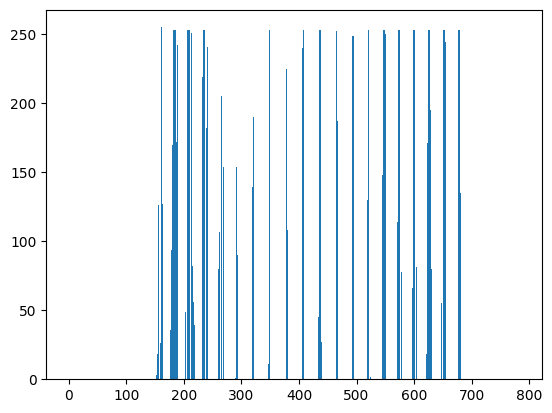

In [ ]:
import matplotlib.pyplot as plt
plt.bar(list(range(len(X[0]))),X[0])

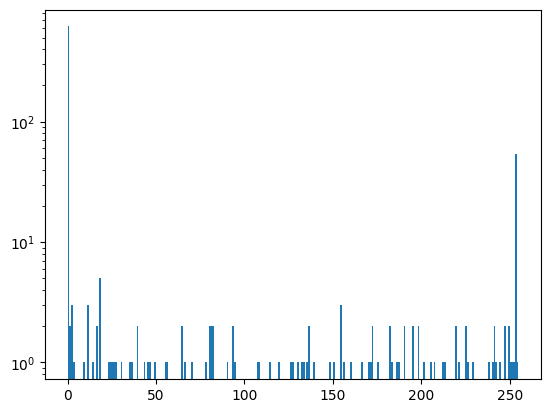

In [ ]:
plt.hist(X[0], bins=255)
plt.yscale("log")
plt.show()

LABEL:  5


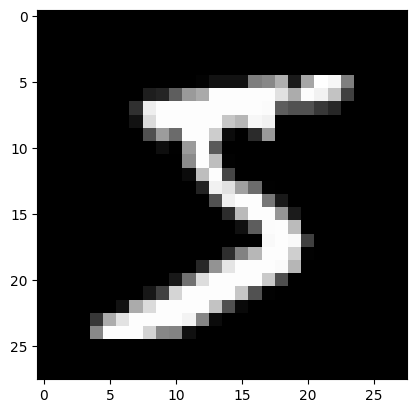

In [ ]:


print("LABEL: ", Y[0])
plt.imshow(X[0].reshape((28,28)), cmap="gray")
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
model1 = LinearRegression()
model1.fit(X, Y)

LinearRegression()

In [ ]:
y1_pred = model1.predict(X)

In [ ]:
y1_pred, Y

(array([4.24166265, 1.18218974, 3.19922958, ..., 7.87853978, 5.58042962,
        5.77723502]),
 array([5, 0, 4, ..., 4, 5, 6]))

In [ ]:
import numpy as np
(y1_pred.round()==Y).sum()/len(X)

0.22757142857142856

In [ ]:
import numpy as np
model2 = LinearRegression()
Y2 = np.array([np.eye(10)[_] for _ in Y])
Y2[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

In [ ]:
model2.fit(X,Y2)

LinearRegression()

In [ ]:
y2 = model2.predict(X)
y2[0]

array([ 8.06062936e-02,  1.33404311e-04, -7.81109236e-02,  4.02657611e-01,
       -1.98306329e-01,  5.25759137e-01,  1.93141708e-01,  3.06880983e-01,
       -1.40383422e-01, -9.32330784e-02])

In [ ]:
(np.argmax(y2, axis=-1) == np.argmax(Y2, axis=-1)).sum()/len(X)

0.8578857142857143

In [ ]:
model1.intercept_

2.9755303100826485

In [ ]:
model2.intercept_

array([ 0.16359   ,  0.2433623 ,  0.05103905,  0.01929909,  0.20569496,
        0.18727076,  0.06903461,  0.14046435, -0.12390439,  0.04429453])

In [ ]:
from sklearn.tree import DecisionTreeRegressor
model3 = DecisionTreeRegressor(random_state=42)

In [ ]:
model3.fit(X,Y)

DecisionTreeRegressor(random_state=42)

In [ ]:
y3 = model3.predict(X)

In [ ]:
y3

array([5., 0., 4., ..., 4., 5., 6.])

In [ ]:
(y3==Y).sum(axis=-1)/len(X)

1.0

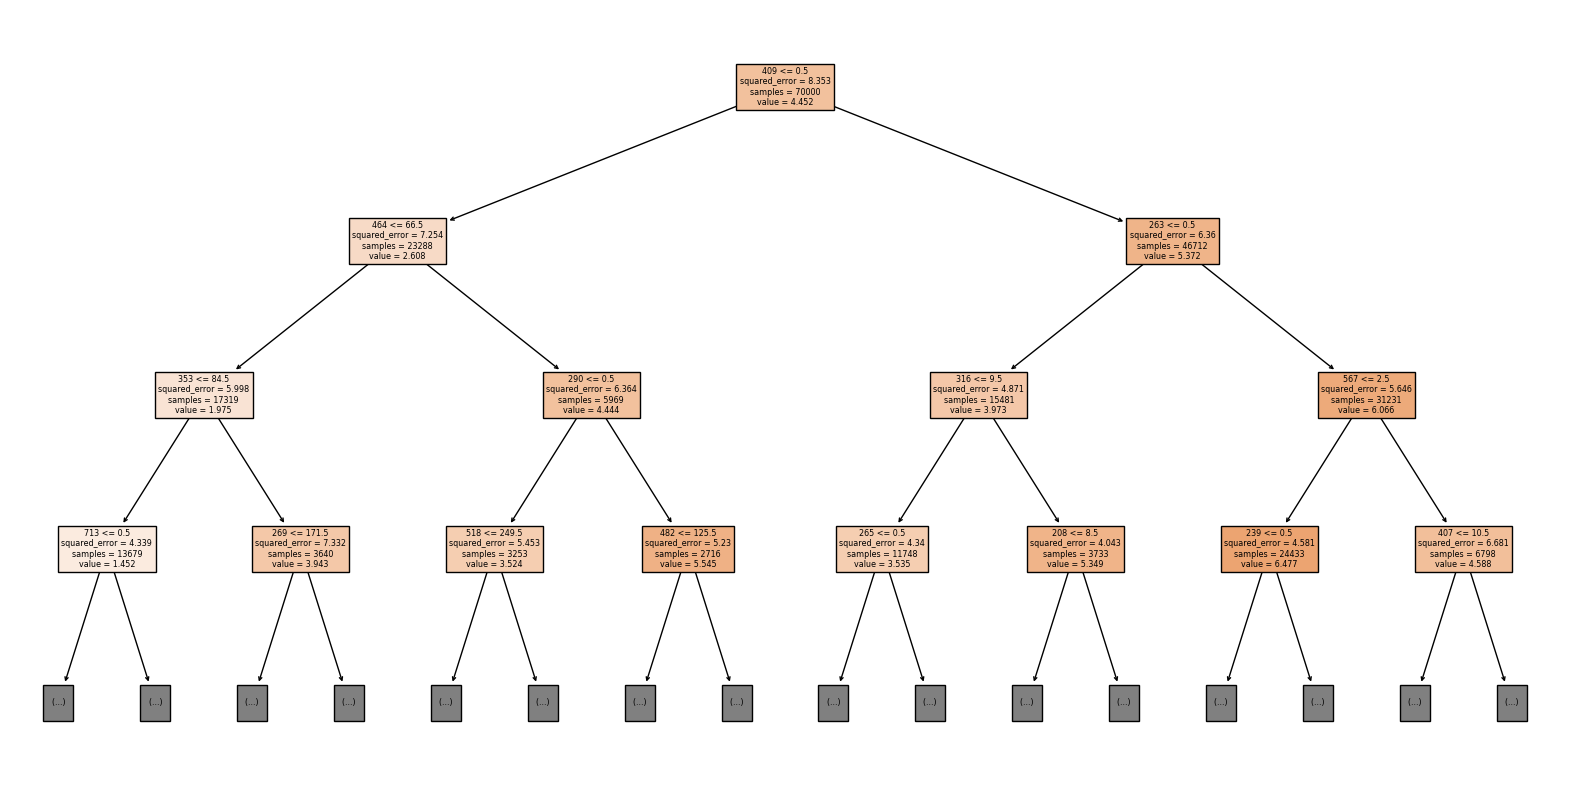

In [ ]:
from sklearn import tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
tree.plot_tree(model3, filled=True, feature_names=[str(_) for _ in range(28*28)], max_depth=3)
plt.show()

In [ ]:
model4 = DecisionTreeRegressor(random_state=42)
model4.fit(X[:10],Y[:10])

DecisionTreeRegressor(random_state=42)

In [ ]:
Y[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4])

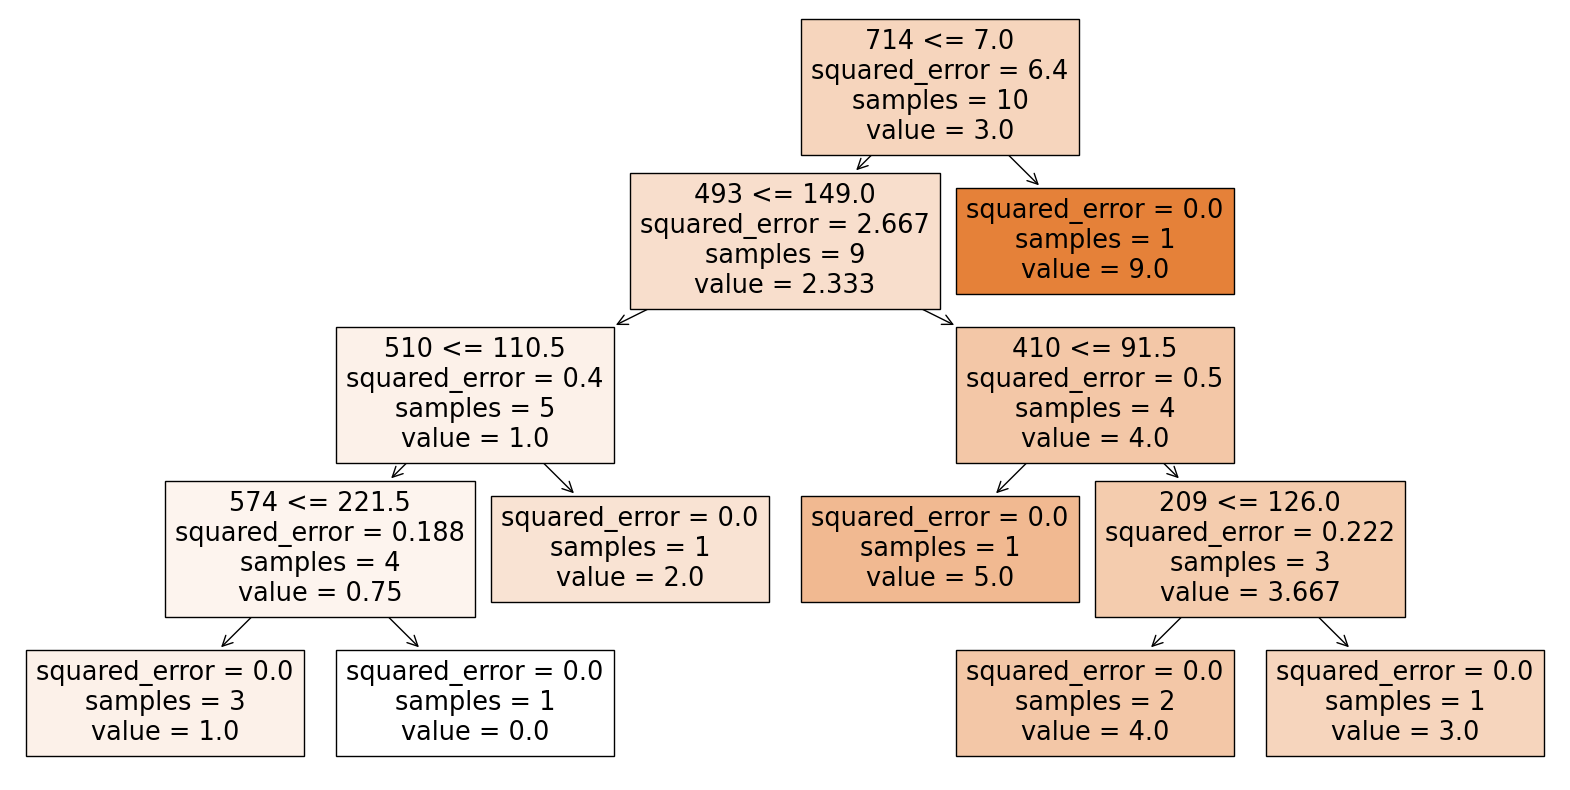

In [ ]:
plt.figure(figsize=(20,10))
tree.plot_tree(model4, filled=True, feature_names=[str(_) for _ in range(28*28)], max_depth=10)
plt.show()

In [ ]:
def Classify(x):
  if x[714] <= 7:
    if x[493] <= 149:
      if x[510] <=110.5:
        if x[574] <= 221.5:
          return 1
        else:
          return 0
      else:
        return 2
    elif x[410] <= 91.5:
      return 5
    elif x[209] <= 126.0:
      return 4
    else:
      return 3
  else:
    return 9



In [ ]:
[Classify(_) for _ in X[:10]]

[5, 0, 4, 1, 9, 2, 1, 3, 1, 4]

In [ ]:
X[:10,714]

array([ 0,  0,  0,  0, 14,  0,  0,  0,  0,  0])

In [ ]:
X[:10,714], Y[:10]

(array([ 0,  0,  0,  0, 14,  0,  0,  0,  0,  0]),
 array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4]))

In [ ]:
(model4.predict(X[:10])==Y[:10]).sum()/10

1.0

In [ ]:
(model4.predict(X[:20])==Y[:20]).sum()/20

0.55

In [ ]:
Y[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4])

In [ ]:
%timeit model3.predict(X)

84.9 ms ± 8.86 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [ ]:
%timeit model1.predict(X)

138 ms ± 9.96 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


# Como pudemos observar, apesar do modelo DecisionTree aprender com 100% de acurácia, com dados novos ele tem um resultado muito ruim. Por isso é importante separar dados para treinar e para validar.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [ ]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((56000, 784), (14000, 784), (56000,), (14000,))

In [ ]:
model4.fit(X_train, Y_train)

DecisionTreeRegressor(random_state=42)

In [ ]:
(model4.predict(X_test)==Y_test).sum()/len(Y_test)

0.8380714285714286

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
model5 = RandomForestClassifier(n_estimators=10, random_state=42)

In [ ]:
model5.fit(X_train, Y_train)

RandomForestClassifier(n_estimators=10, random_state=42)

In [ ]:
(model5.predict(X_train)==Y_train).sum()/len(Y_train)

0.9994107142857143

In [ ]:
(model5.predict(X_test)==Y_test).sum()/len(Y_test)

0.9455714285714286

In [ ]:
%timeit model5.predict(X)

502 ms ± 72.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
from xgboost import XGBClassifier

In [ ]:
model6 = XGBClassifier(n_estimators=20, random_state=42)

In [ ]:
model6.fit(X_train, Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=20, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
(model6.predict(X_test)==Y_test).sum()/len(Y_test)

0.9597142857142857

In [ ]:
(model6.predict(X_train)==Y_train).sum()/len(Y_train)

0.9858035714285714